# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## importing dataset

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# Exploratory Data Analysis 

## Null Value Counts and Dataset exploration

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
def barchart(feature):
    survived=train[train["Survived"]==1][feature].value_counts()
    dead=train[train["Survived"]==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=["survived",'dead']
    df.plot(kind="bar",stacked=True)
    plt.show()

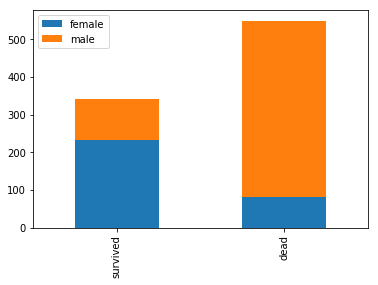

In [5]:
barchart("Sex")

In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

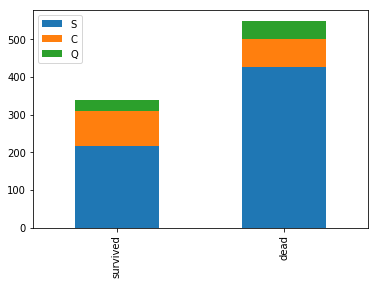

In [8]:
barchart("Embarked")

In [9]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


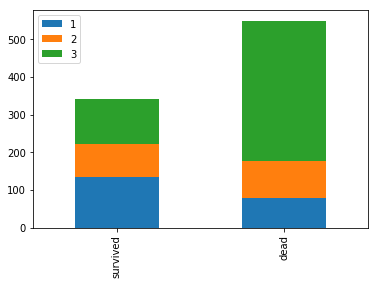

In [10]:
barchart("Pclass")

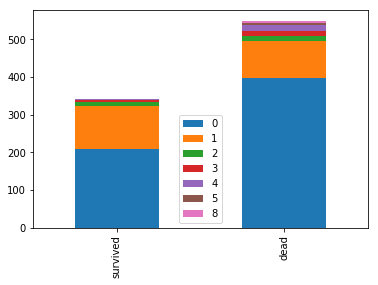

In [11]:
barchart("SibSp")

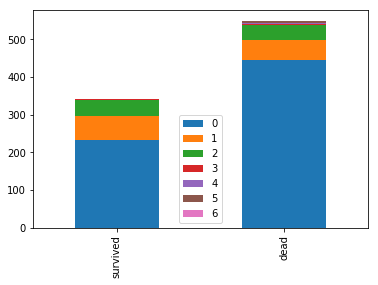

In [12]:
barchart("Parch")

In [13]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data preprocessing

In [14]:
train=train.drop(["Ticket"],axis=1)
test=test.drop(["Ticket"],axis=1)
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
age_map={"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
train["Title"]=train["Name"].str.extract('([A-Za-z]+)\.',expand=False).map(age_map)
test["Title"]=test["Name"].str.extract('([A-Za-z]+)\.',expand=False).map(age_map)

In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,2


In [18]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

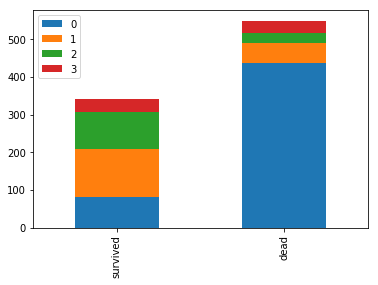

In [20]:
barchart("Title")

In [21]:
test=test.drop("Name",axis=1)
train=train.drop("Name",axis=1)

In [22]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,12.2875,NaN,S,2


In [23]:
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)

In [24]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,12.2875,NaN,S,2


In [25]:
gender_map={"male":0,"female":1}
test["Sex"]=test["Sex"].map(gender_map)
train["Sex"]=train["Sex"].map(gender_map)

In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,12.2875,NaN,S,2


In [27]:

train.loc[ train['Age'] <= 16, 'Age'] = 0,
train.loc[(train['Age'] > 16) & (train['Age'] <= 26), 'Age'] = 1,
train.loc[(train['Age'] > 26) & (train['Age'] <= 36), 'Age'] = 2,
train.loc[(train['Age'] > 36) & (train['Age'] <= 62), 'Age'] = 3,
train.loc[ train['Age'] > 62, 'Age'] = 4
test.loc[ test['Age'] <= 16, 'Age'] = 0,
test.loc[(test['Age'] > 16) & (test['Age'] <= 26), 'Age'] = 1,
test.loc[(test['Age'] > 26) & (test['Age'] <= 36), 'Age'] = 2,
test.loc[(test['Age'] > 36) & (test['Age'] <= 62), 'Age'] = 3,
test.loc[ test['Age'] > 62, 'Age'] = 4
    

In [28]:

train.loc[ train['Fare'] <= 17, 'Fare'] = 0,
train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1,
train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare'] = 2,
train.loc[ train['Fare'] > 100, 'Fare'] = 3
test.loc[ test['Fare'] <= 17, 'Fare'] = 0,
test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1,
test.loc[(test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2,
test.loc[ test['Fare'] > 100, 'Fare'] = 3
    

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,0.0,NaN,S,0
1,2,1,1,1,3.0,1,0,2.0,C85,C,2
2,3,1,3,1,1.0,0,0,0.0,NaN,S,1
3,4,1,1,1,2.0,1,0,2.0,C123,S,2
4,5,0,3,0,2.0,0,0,0.0,NaN,S,0


In [30]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [31]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train['FamilySize'] = train['FamilySize'].map(family_mapping)
test['FamilySize']=test['FamilySize'].map(family_mapping)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,0.0,NaN,S,0,0.4
1,2,1,1,1,3.0,1,0,2.0,C85,C,2,0.4
2,3,1,3,1,1.0,0,0,0.0,NaN,S,1,0.0
3,4,1,1,1,2.0,1,0,2.0,C123,S,2,0.4
4,5,0,3,0,2.0,0,0,0.0,NaN,S,0,0.0


In [33]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Title            0
FamilySize       0
dtype: int64

In [35]:
train['Cabin']=train["Cabin"].str[:1]
test['Cabin']=test["Cabin"].str[:1]

In [36]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin']=test["Cabin"].map(cabin_mapping)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,0.0,NaN,S,0,0.4
1,2,1,1,1,3.0,1,0,2.0,0.8,C,2,0.4
2,3,1,3,1,1.0,0,0,0.0,NaN,S,1,0.0
3,4,1,1,1,2.0,1,0,2.0,0.8,S,2,0.4
4,5,0,3,0,2.0,0,0,0.0,NaN,S,0,0.0


In [38]:
train["Embarked"].fillna("S",inplace=True)

In [39]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [40]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,91.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,1.763158,0.447368,0.392344,0.775120,0.918681,0.732057,0.335885
std,120.810458,0.841838,0.481622,0.971479,0.896760,0.981429,0.999834,0.557756,0.972019,0.607629
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000
50%,1100.500000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,3.000000,1.000000,0.000000,2.000000,1.200000,1.000000,0.400000
max,1309.000000,3.000000,1.000000,4.000000,8.000000,9.000000,3.000000,2.400000,3.000000,4.000000


In [41]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [42]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [43]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [44]:
dummy=pd.get_dummies(train[['Embarked']])

In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,0.0,2.0,S,0,0.4
1,2,1,1,1,3.0,1,0,2.0,0.8,C,2,0.4
2,3,1,3,1,1.0,0,0,0.0,2.0,S,1,0.0
3,4,1,1,1,2.0,1,0,2.0,0.8,S,2,0.4
4,5,0,3,0,2.0,0,0,0.0,2.0,S,0,0.0


In [46]:
train=pd.concat([train,dummy],axis=1)

In [47]:
train=train.drop("Embarked",axis=1)

In [48]:
dummytest=pd.get_dummies(test[["Embarked"]])

In [49]:
test=pd.concat([test,dummytest],axis=1)

In [50]:
test=test.drop("Embarked",axis=1)

In [51]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,2.0,0,0,0.0,2.0,0,0.0,0,1,0
1,893,3,1,3.0,1,0,0.0,2.0,2,0.4,0,0,1
2,894,2,0,3.0,0,0,0.0,2.0,0,0.0,0,1,0
3,895,3,0,2.0,0,0,0.0,2.0,0,0.0,0,0,1
4,896,3,1,1.0,1,1,0.0,2.0,2,0.8,0,0,1


In [52]:
train=train.drop("PassengerId",axis=1)
passenger_id=test["PassengerId"]
test=test.drop("PassengerId",axis=1)

In [53]:
target = train['Survived']
train=train.drop("Survived",axis=1)

# Model Building

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_x,cross_val_x,train_y,cross_val_y=train_test_split(train,target,test_size=0.1,shuffle=True)

## feature importances for back elimination process

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
labels=train.columns[0:]

In [58]:
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)

In [59]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1.0,1,0,0.0,2.0,0,0.4,0,0,1
1,1,1,3.0,1,0,2.0,0.8,2,0.4,1,0,0
2,3,1,1.0,0,0,0.0,2.0,1,0.0,0,0,1
3,1,1,2.0,1,0,2.0,0.8,2,0.4,0,0,1
4,3,0,2.0,0,0,0.0,2.0,0,0.0,0,0,1


In [60]:
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)

In [61]:
forest.fit(train,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [62]:
importances = forest.feature_importances_

In [63]:
indices = np.argsort(importances)[::-1]

In [64]:
for f in range(train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,labels[f],importances[indices[f]]))


 1) Pclass                         0.218960
 2) Sex                            0.195619
 3) Age                            0.120608
 4) SibSp                          0.104196
 5) Parch                          0.080300
 6) Fare                           0.075225
 7) Cabin                          0.075096
 8) Title                          0.044993
 9) FamilySize                     0.034072
10) Embarked_C                     0.021067
11) Embarked_Q                     0.018586
12) Embarked_S                     0.011279


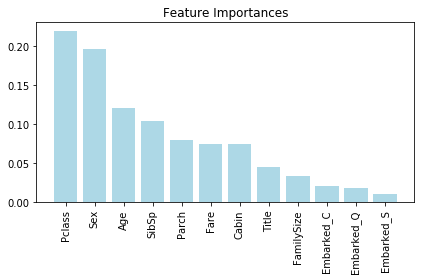

In [65]:
plt.title('Feature Importances')
plt.bar(range(train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(train.shape[1]),labels, rotation=90)
plt.xlim([-1, train.shape[1]])
plt.tight_layout()
plt.show()

# Models

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [67]:
from sklearn.svm import SVC

In [68]:
ppn=SVC()

In [69]:
ppn=SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)

In [70]:
ppn.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
prediction=ppn.predict(cross_val_x)

In [72]:
print("Accuracy:",accuracy_score(cross_val_y,prediction))

Accuracy: 0.6888888888888889


In [73]:
confusion_matrix(cross_val_y,prediction)

array([[39, 21],
       [ 7, 23]])

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
ppn=DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

In [76]:
ppn.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [77]:
prediction=ppn.predict(cross_val_x)

In [78]:
print("Accuracy:",accuracy_score(cross_val_y,prediction))

Accuracy: 0.9


In [79]:
confusion_matrix(cross_val_y,prediction)

array([[58,  2],
       [ 7, 23]])

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
ppn=RandomForestClassifier(criterion='entropy',n_estimators=20,random_state=1,n_jobs=2)

In [82]:
ppn.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [83]:
prediction=ppn.predict(cross_val_x)

In [84]:
print("Accuracy:",accuracy_score(cross_val_y,prediction))

Accuracy: 0.8222222222222222


In [85]:
confusion_matrix(cross_val_y,prediction)

array([[54,  6],
       [10, 20]])

In [86]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,3,0,2.0,0,0,0.0,2.0,0,0.0,0,1,0
1,3,1,3.0,1,0,0.0,2.0,2,0.4,0,0,1
2,2,0,3.0,0,0,0.0,2.0,0,0.0,0,1,0
3,3,0,2.0,0,0,0.0,2.0,0,0.0,0,0,1
4,3,1,1.0,1,1,0.0,2.0,2,0.8,0,0,1


In [87]:
prediction=ppn.predict(test)

In [88]:
submission = pd.DataFrame({"PassengerId": passenger_id,"Survived": prediction})
submission.to_csv('submission.csv', index=False)